In [34]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import kagglehub
from kagglehub import KaggleDatasetAdapter
#here are 

In [35]:
#first of all lets know the project.


# This project builds a machine learning model to predict whether a person will default on a loan or not.
# It uses a dataset with borrower and loan details like credit score, income, loan amount, interest rate, and LTV.
# The model learns patterns from past data (where 'Status' shows if someone defaulted) and then predicts the risk for new applicants.
# This helps banks make smarter, data-driven lending decisions.

In [36]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
        
import kagglehub


path = kagglehub.dataset_download("yasserh/loan-default-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pavan\.cache\kagglehub\datasets\yasserh\loan-default-dataset\versions\1


In [37]:
data = pd.read_csv('kaggle/input/dataset-loan_default/Loan_Default.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [38]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [40]:
data.shape

(148670, 34)

In [41]:
#i want to see in each column what are the possible values so i am using this for loop for that
for col in data.columns:
    if data[col].dtypes == object:
        print(col + ' ' + '-'*(30-len(col)) + ' ', data[col].unique())
    else:
        pass

loan_limit --------------------  ['cf' nan 'ncf']
Gender ------------------------  ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv -----------------  ['nopre' 'pre' nan]
loan_type ---------------------  ['type1' 'type2' 'type3']
loan_purpose ------------------  ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness -------------  ['l1' 'l2']
open_credit -------------------  ['nopc' 'opc']
business_or_commercial --------  ['nob/c' 'b/c']
Neg_ammortization -------------  ['not_neg' 'neg_amm' nan]
interest_only -----------------  ['not_int' 'int_only']
lump_sum_payment --------------  ['not_lpsm' 'lpsm']
construction_type -------------  ['sb' 'mh']
occupancy_type ----------------  ['pr' 'sr' 'ir']
Secured_by --------------------  ['home' 'land']
total_units -------------------  ['1U' '2U' '3U' '4U']
credit_type -------------------  ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type ------  ['CIB' 'EXP']
age ---------------------------  ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<2

In [42]:
#now lets see how many missing values are present in each colum in our dataset
print("missing values of each column as percentage:")
round(data.isna().sum()/data.shape[0] * 100,2).sort_values()


missing values of each column as percentage:


ID                            0.00
year                          0.00
Gender                        0.00
loan_type                     0.00
Credit_Worthiness             0.00
loan_amount                   0.00
business_or_commercial        0.00
open_credit                   0.00
credit_type                   0.00
Credit_Score                  0.00
Secured_by                    0.00
total_units                   0.00
occupancy_type                0.00
construction_type             0.00
lump_sum_payment              0.00
interest_only                 0.00
Region                        0.00
Security_Type                 0.00
co-applicant_credit_type      0.00
Status                        0.00
term                          0.03
Neg_ammortization             0.08
loan_purpose                  0.09
submission_of_application     0.13
age                           0.13
approv_in_adv                 0.61
loan_limit                    2.25
income                        6.15
LTV                 

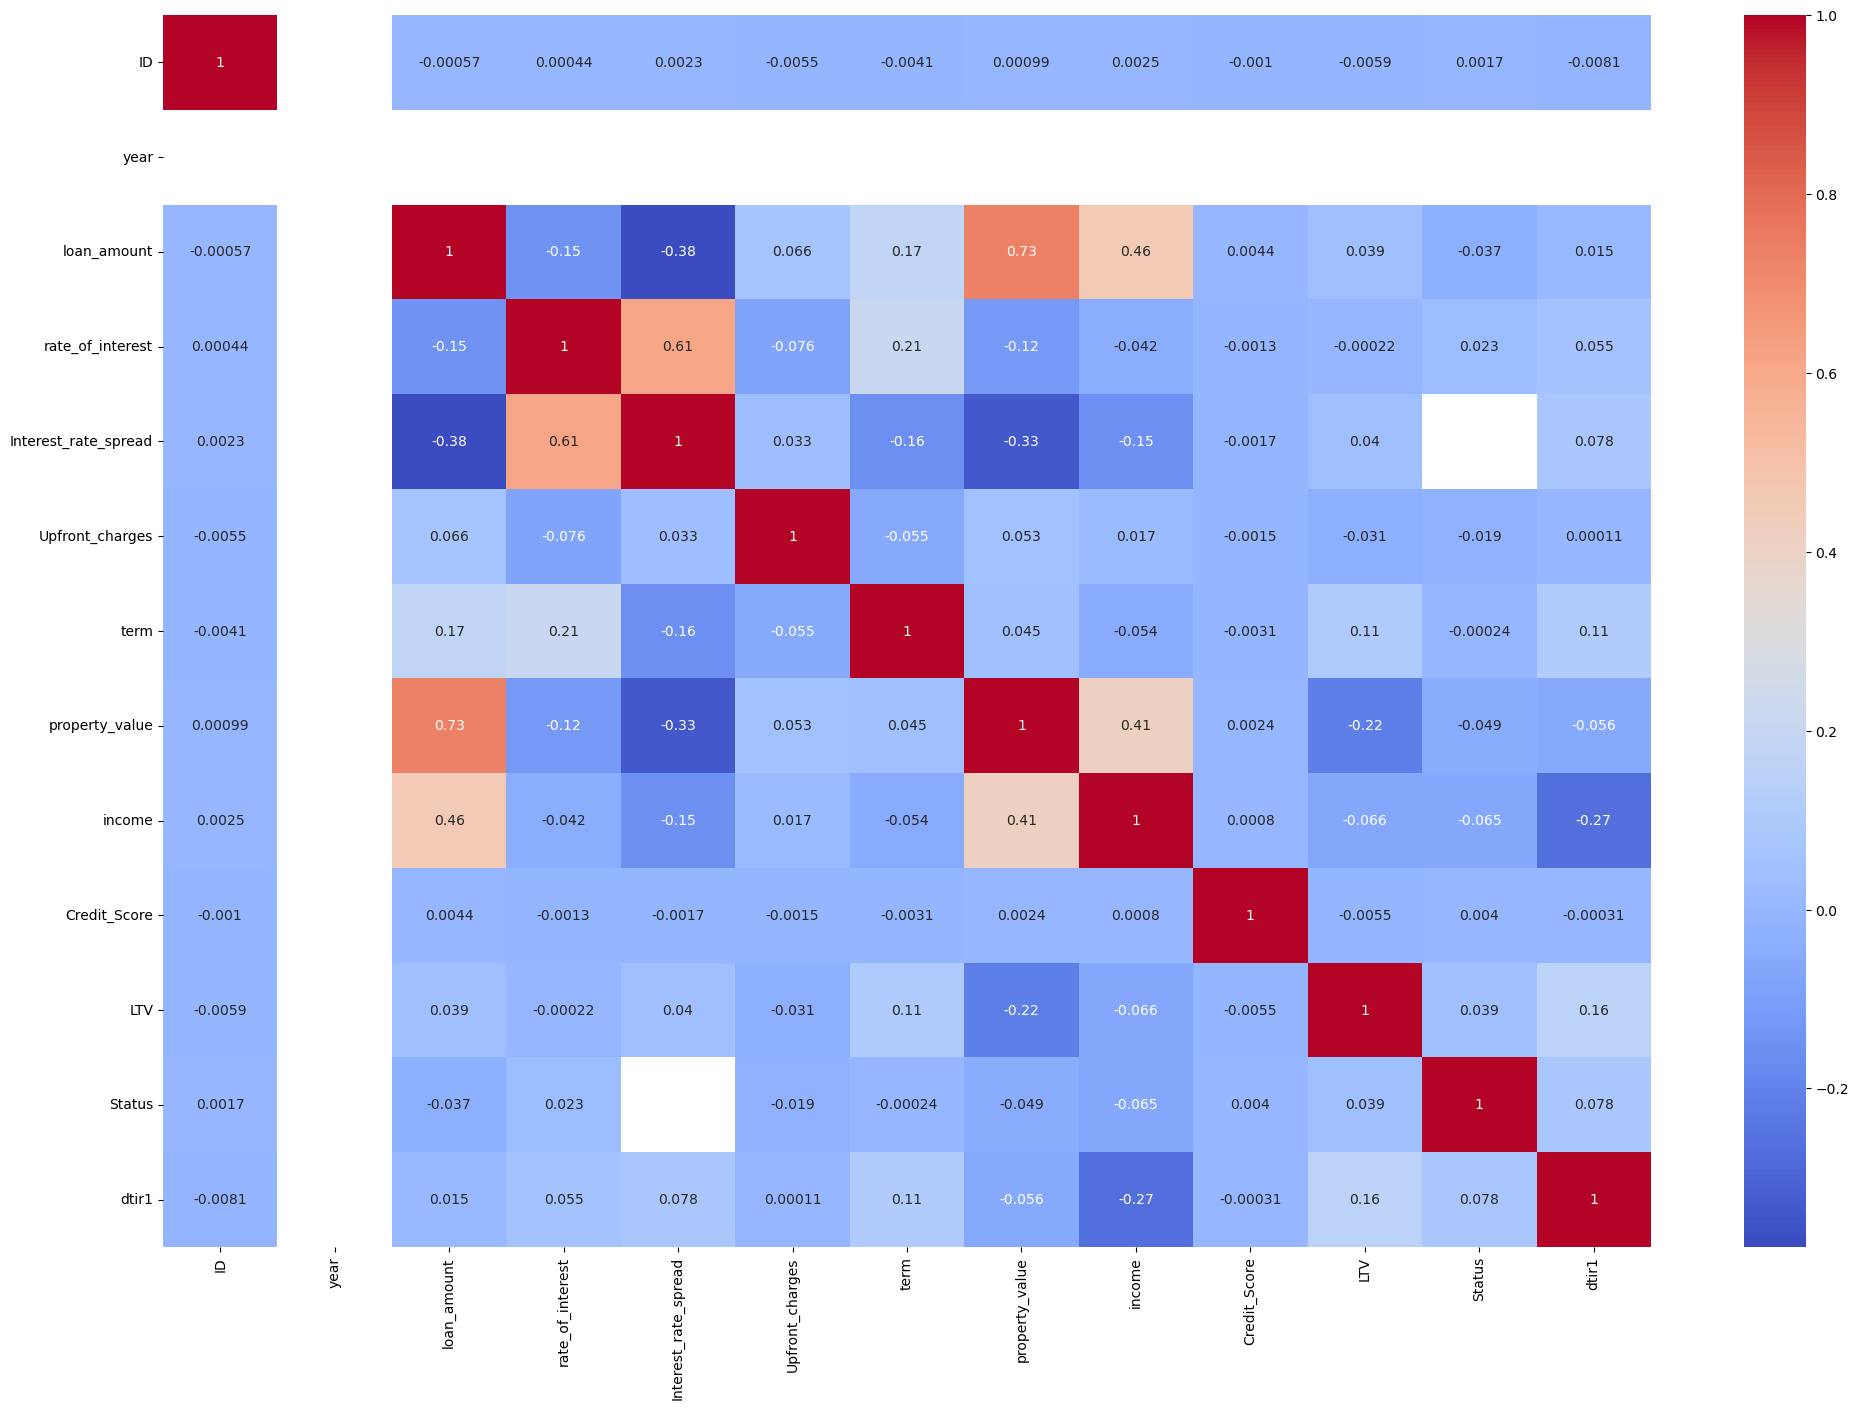

In [43]:

column_types = data.dtypes

# Selecting only the numeric columns
numeric_columns = data.select_dtypes(include=[np.number])

# Creating a correlation matrix for the numeric columns
c = numeric_columns.corr()

# Creating a correlation heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(c, cmap="coolwarm", annot=True)
plt.show()

In [44]:
#heare we can see
#there are lot of unwanted columns (or the colums that we are not going to use in training our model as they will not add any accuracy to our
# model that we are going to train. so first lets drop them 

In [45]:
#we are copying data so the original file remains as it is for future reference
loan_columns=data.copy()
loan_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [46]:
# loan_columns.drop(columns=['ID' ,'loan_limit' ,'Gender', 'construction_type', 'Secured_by', 'total_units', \
#                    'credit_type', 'co-applicant_credit_type', 'Region', 'Neg_ammortization', 'year', \
#                    'submission_of_application' , 'approv_in_adv'], 
#           axis=1, inplace=True)

# loan_columns.describe()

In [47]:
loan_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [48]:
for col in loan_columns.columns:
    if loan_columns[col].dtypes == object:
        print(col + ' ' + '-'*(20 - len(col)) + ' ', loan_columns[col].unique())
    else:
        print(col + ' ' + '-'*(20 - len(col)) + ' Numeric column')


ID ------------------ Numeric column
year ---------------- Numeric column
loan_limit ----------  ['cf' nan 'ncf']
Gender --------------  ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv -------  ['nopre' 'pre' nan]
loan_type -----------  ['type1' 'type2' 'type3']
loan_purpose --------  ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness ---  ['l1' 'l2']
open_credit ---------  ['nopc' 'opc']
business_or_commercial   ['nob/c' 'b/c']
loan_amount --------- Numeric column
rate_of_interest ---- Numeric column
Interest_rate_spread  Numeric column
Upfront_charges ----- Numeric column
term ---------------- Numeric column
Neg_ammortization ---  ['not_neg' 'neg_amm' nan]
interest_only -------  ['not_int' 'int_only']
lump_sum_payment ----  ['not_lpsm' 'lpsm']
property_value ------ Numeric column
construction_type ---  ['sb' 'mh']
occupancy_type ------  ['pr' 'sr' 'ir']
Secured_by ----------  ['home' 'land']
total_units ---------  ['1U' '2U' '3U' '4U']
income -------------- Numeric column
credit

In [49]:
# Checking for duplicates
print('Number of duplicated records: ', len(loan_columns[loan_columns.duplicated() == True]))

# Remove duplicates and double checking
loan = loan_columns.drop_duplicates()
print('Number of duplicated records (updated): ', len(loan_columns[loan_columns.duplicated() == True]))

Number of duplicated records:  0
Number of duplicated records (updated):  0


In [50]:
# Checking for missing data

print('Pecentage of missing data:    %')
print('-------------------------------')
round(loan.isna().sum()/loan.shape[0] * 100,2).sort_values()

Pecentage of missing data:    %
-------------------------------


ID                            0.00
year                          0.00
Gender                        0.00
loan_type                     0.00
Credit_Worthiness             0.00
loan_amount                   0.00
business_or_commercial        0.00
open_credit                   0.00
credit_type                   0.00
Credit_Score                  0.00
Secured_by                    0.00
total_units                   0.00
occupancy_type                0.00
construction_type             0.00
lump_sum_payment              0.00
interest_only                 0.00
Region                        0.00
Security_Type                 0.00
co-applicant_credit_type      0.00
Status                        0.00
term                          0.03
Neg_ammortization             0.08
loan_purpose                  0.09
submission_of_application     0.13
age                           0.13
approv_in_adv                 0.61
loan_limit                    2.25
income                        6.15
LTV                 

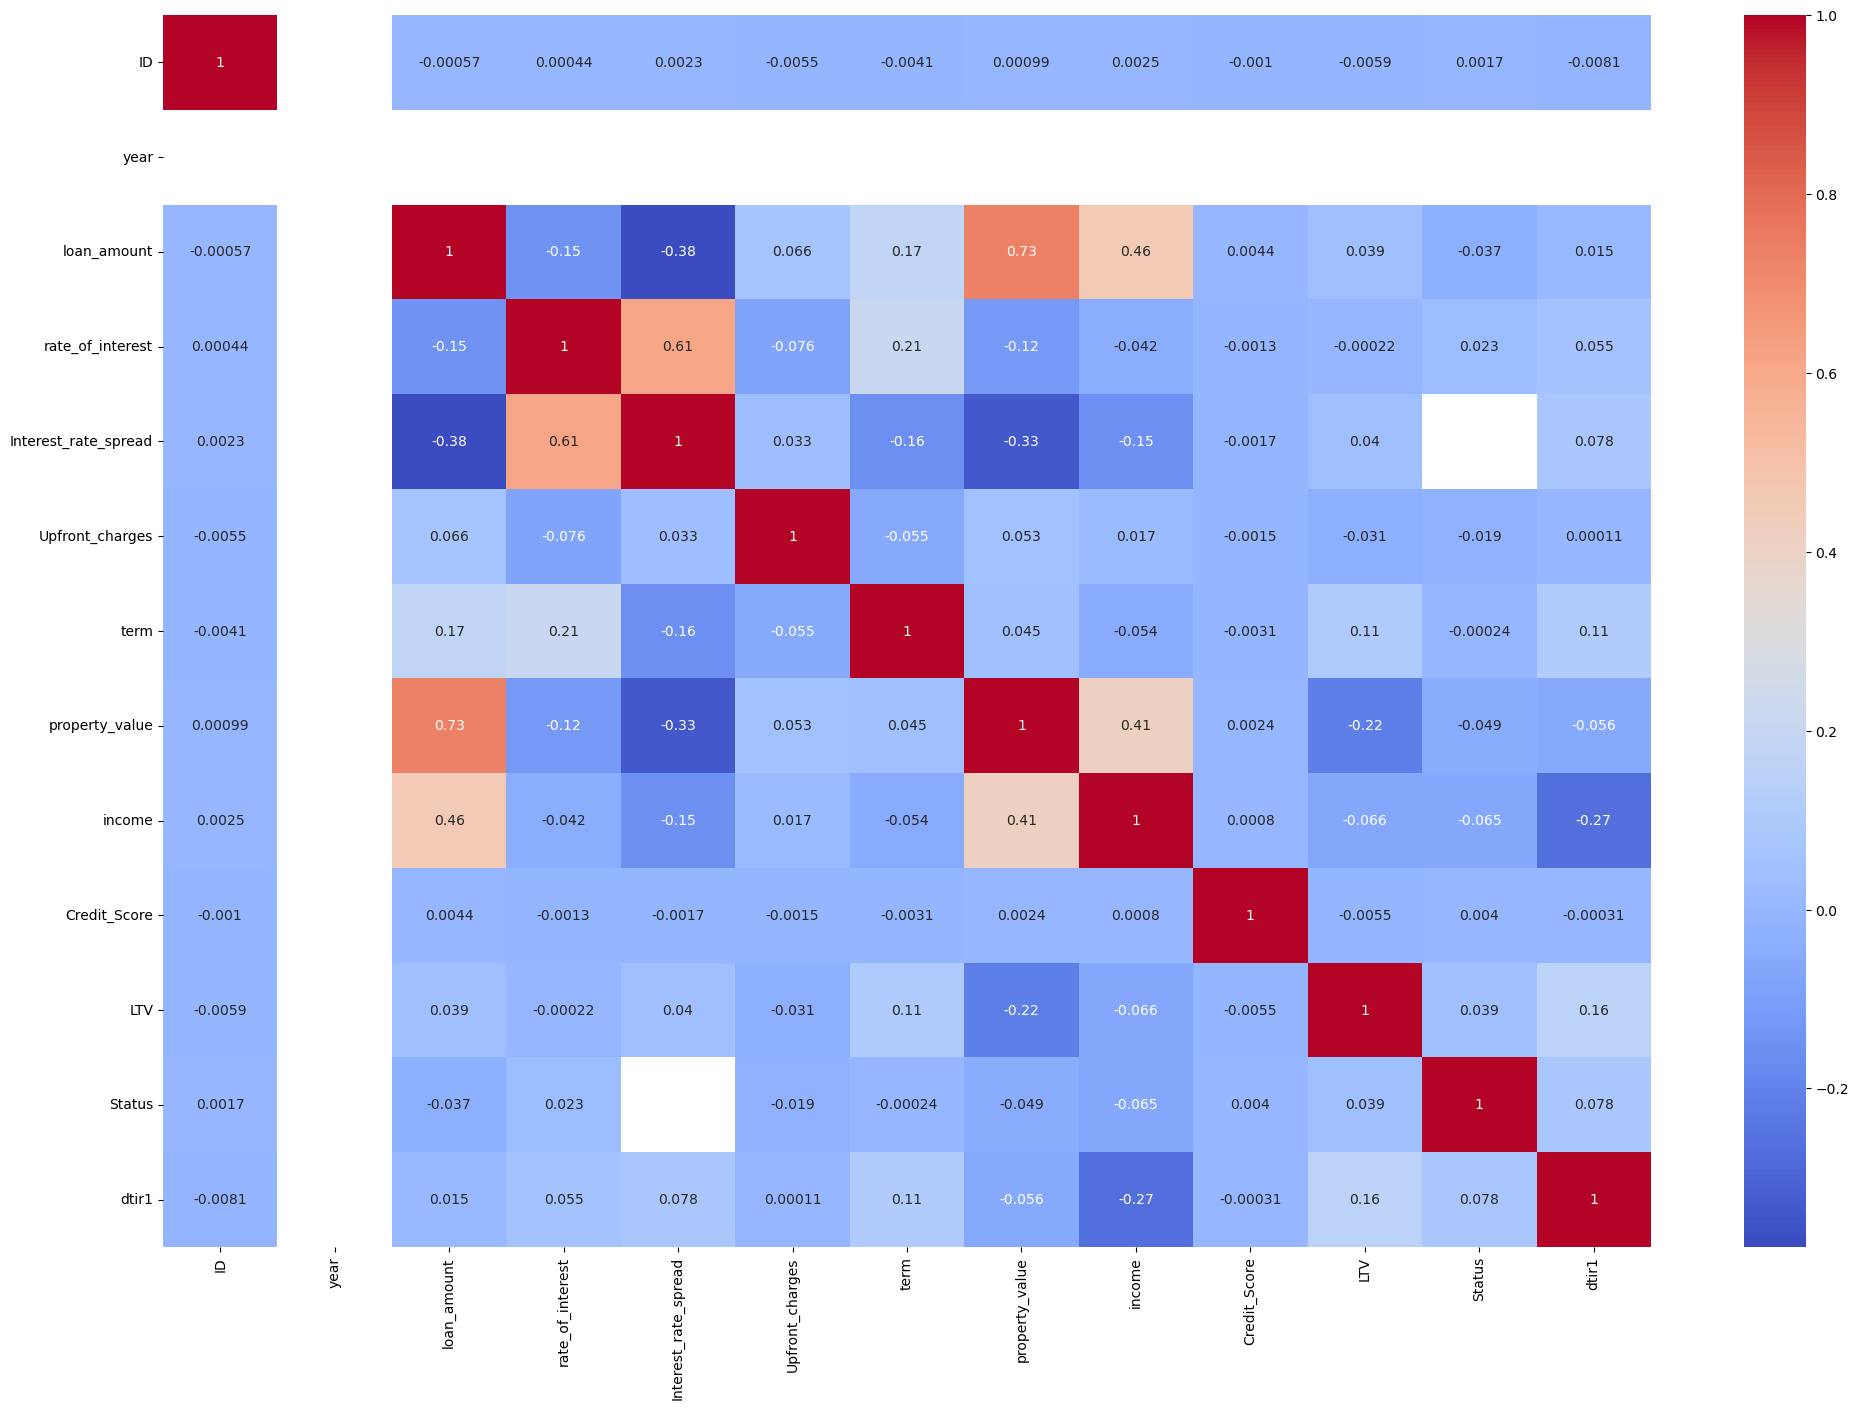

In [51]:
column_types = loan.dtypes
numeric_columns = loan.select_dtypes(include=[np.number])
c = numeric_columns.corr()
plt.figure(figsize=(24, 16))
sns.heatmap(c, cmap="coolwarm", annot=True)
plt.show()

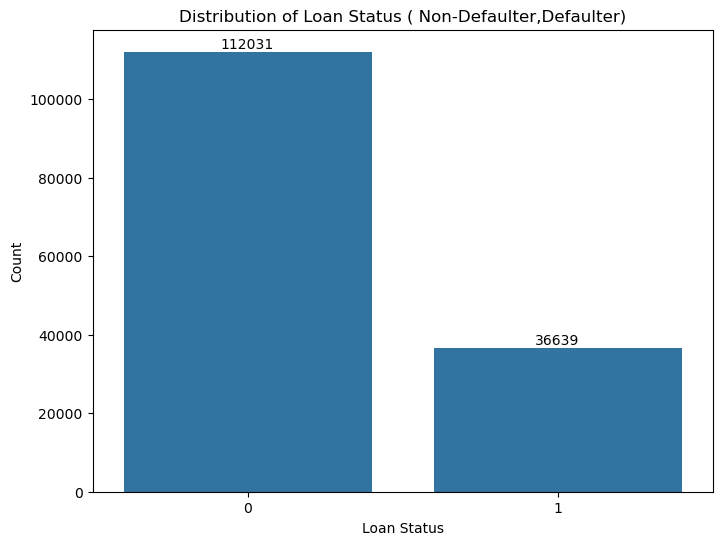

In [52]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=loan)

plt.title('Distribution of Loan Status ( Non-Defaulter,Defaulter)')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Add count labels
for container in plt.gca().containers:
    plt.bar_label(container)

plt.show()

In [53]:
#here we can see about 36,000 loans or almost 25% of the dataset are defaults (mean value of Status). The dataset is imbalance but not significantly.

In [54]:
#till now i have dropped only those columns that are confirmed that they will not help in improving accuracy
#i am not going to delete the rows of missing and null values now as may be in next iterations some more columns be dropped.
#so we may loose some good rows because of unwated columns with null values.so i will delete rows after confirming all the columns

In [55]:
#heres why i dropped some of the columns that i felt according to the data and through statistical analysis and through correlation matrices i made

In [56]:
# ID — it’s just a random unique number given to each record,  
# it doesn’t describe borrower behavior, so we can safely remove it  


# loan_limit — it’s a kind of regulatory tag (like conforming or not),  
# doesn’t tell us anything directly about default risk  


# Gender — personal detail, doesn’t affect repayment ability,  
# also not ethical to include gender in a financial model  


# construction_type — shows whether the property is new or old,  
# not directly linked with whether someone will default or not  


# Secured_by — tells what the loan is backed by (like a property),  
# almost all loans are similar, so it doesn’t add much variety  


# total_units — usually has the same values (like single unit homes),  
# not giving new insights, so we can drop it  


# credit_type — only tells which credit bureau’s data was used,  
# doesn’t influence the loan outcome itself  


# co-applicant_credit_type — same as above,  
# it’s just a source label, not an actual risk indicator  


# Region — very broad category (like north, south, etc.),  
# not very helpful in predicting loan defaults  


# Neg_ammortization — too many missing values,  
# and only applies to a few rare cases, so better to remove it  


# year — just tells when the loan was taken,  
# not needed for predicting borrower default behavior  


# submission_of_application — administrative info about how the form was submitted,  
# doesn’t affect whether the loan will be paid back  


# approv_in_adv — pre-approval status doesn’t always reflect repayment ability,  
# not giving much useful signal for our model

In [57]:
#here are the columns that data shows as important and i personally felt

# Credit_Score
# loan_amount
# rate_of_interest
# Interest_rate_spread
# Upfront_charges
# term
# property_value
# income
# loan_purpose
# Credit_Worthiness
# LTV
# dtir1 (Debt-to-Income Ratio)
# Status (Target Variable)

#these columns are definitely going to help in training the model
#lets see about the remaining columns in next iteration

In [58]:
loan.to_csv('datasets/evaluated_dataset.csv', index=False)
df=pd.read_csv('datasets/evaluated_dataset.csv')

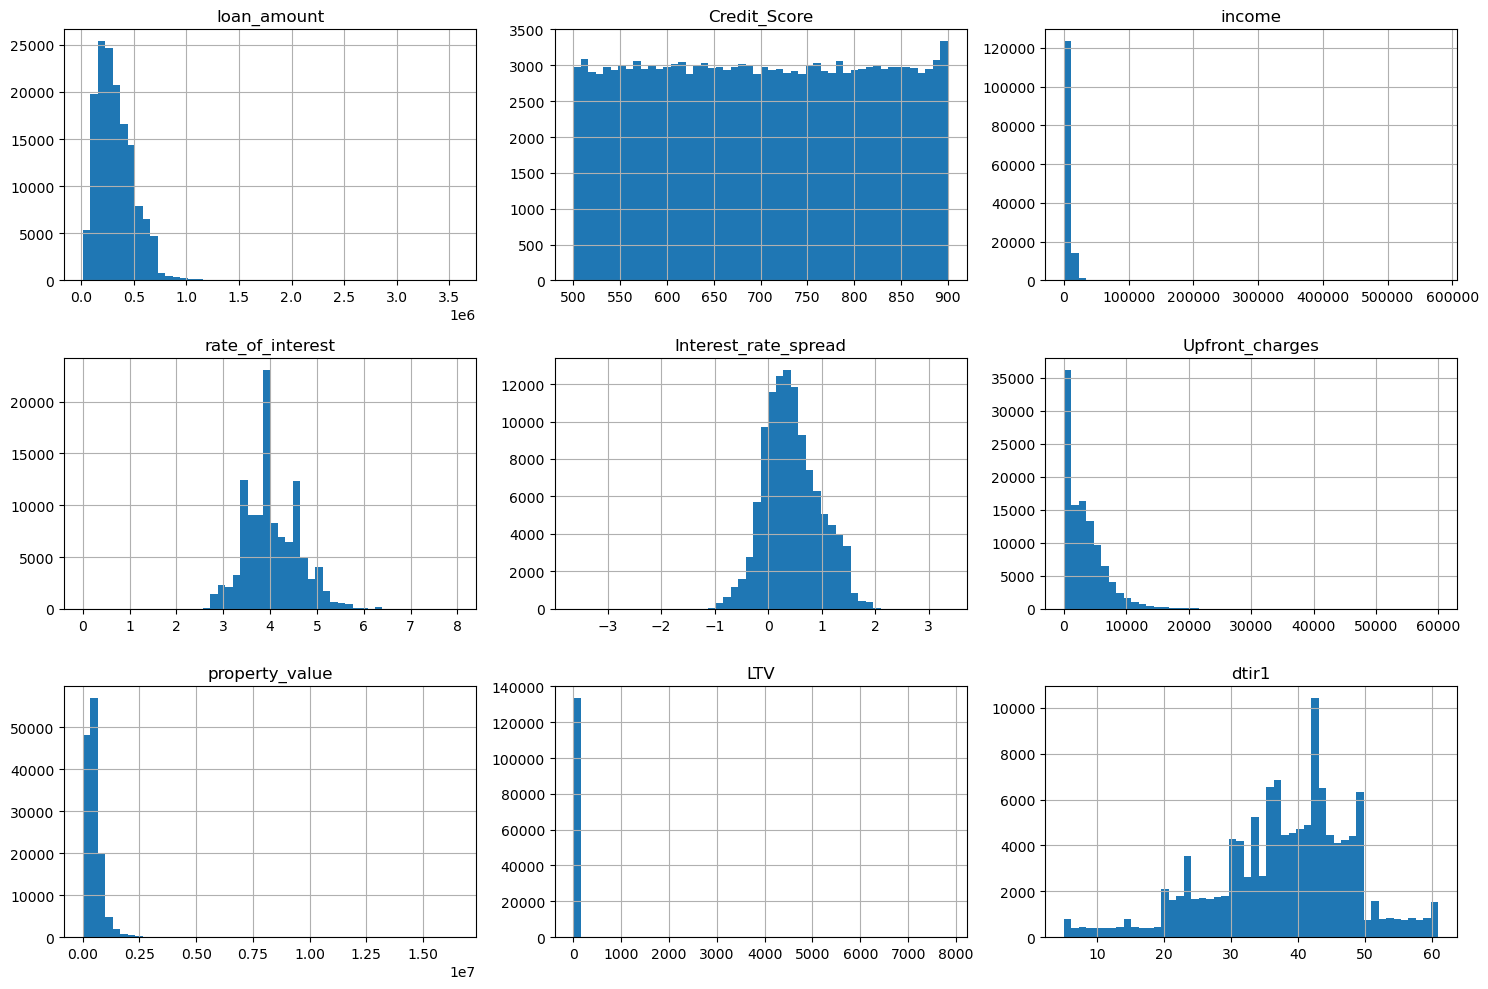

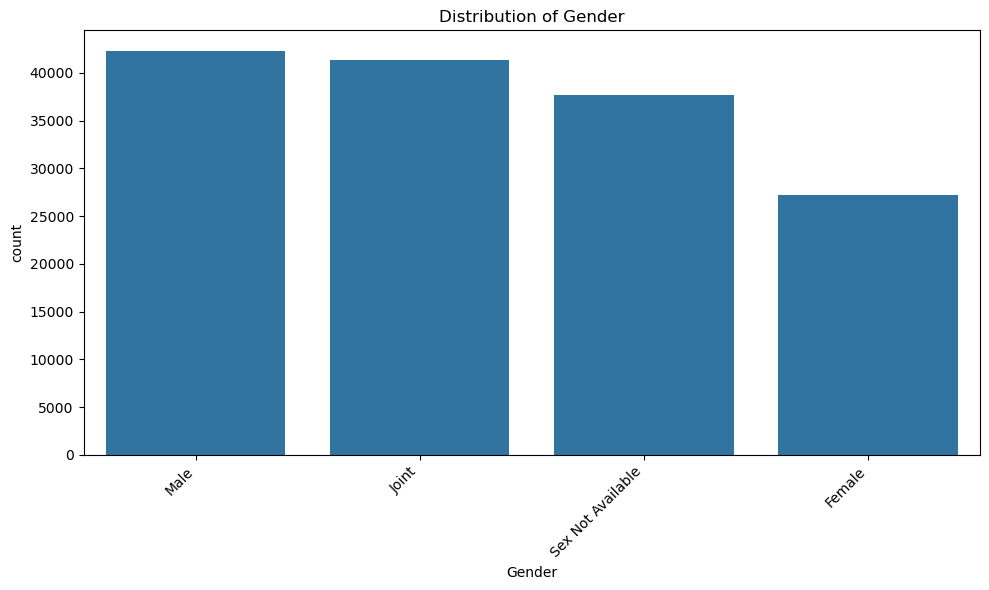

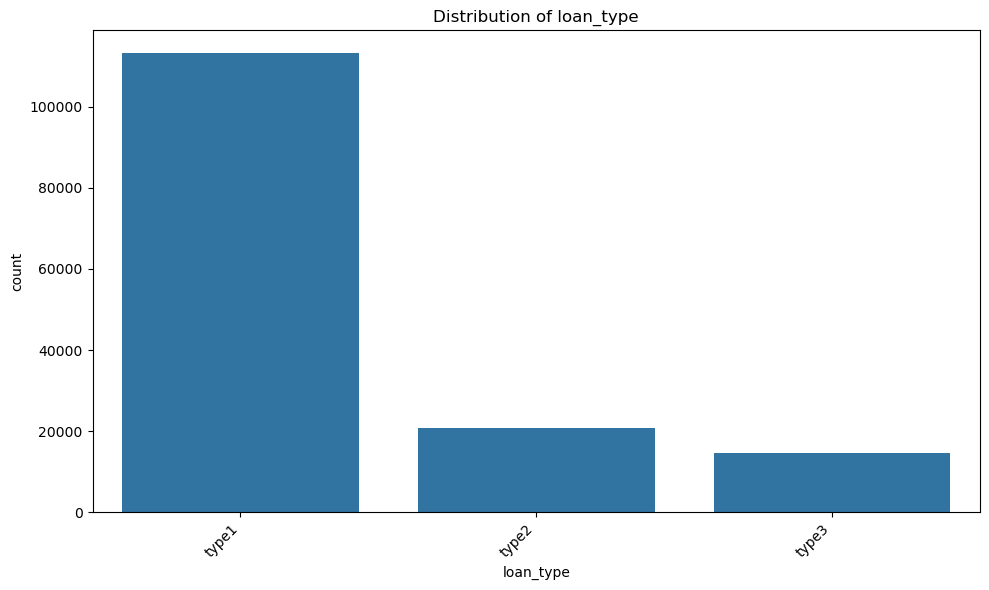

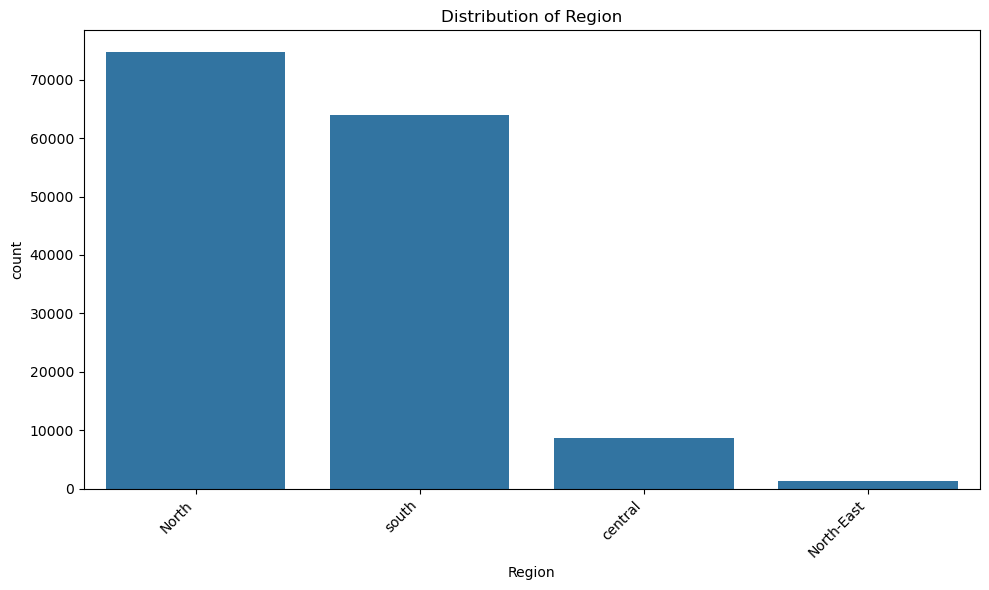

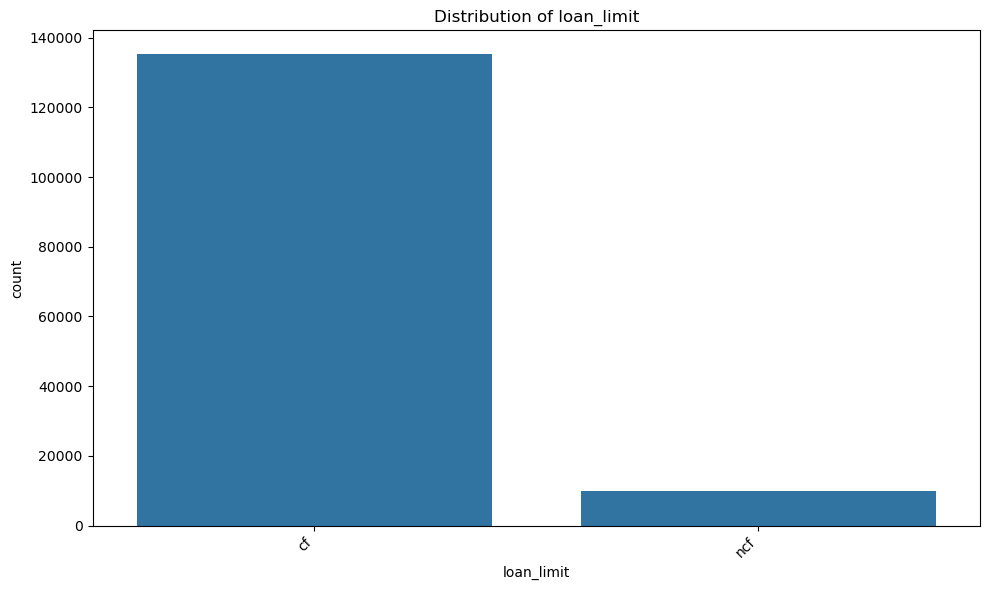

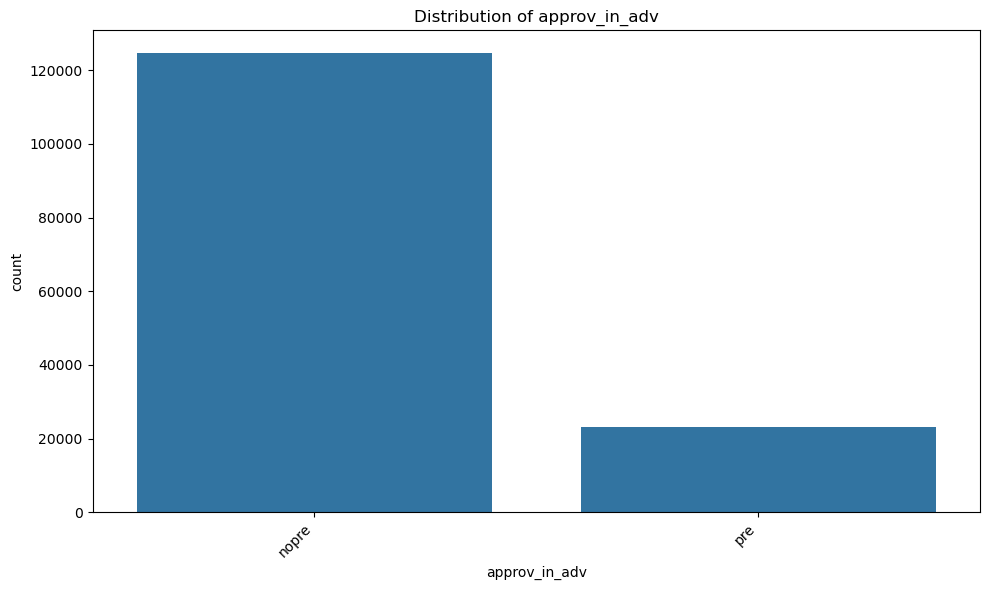

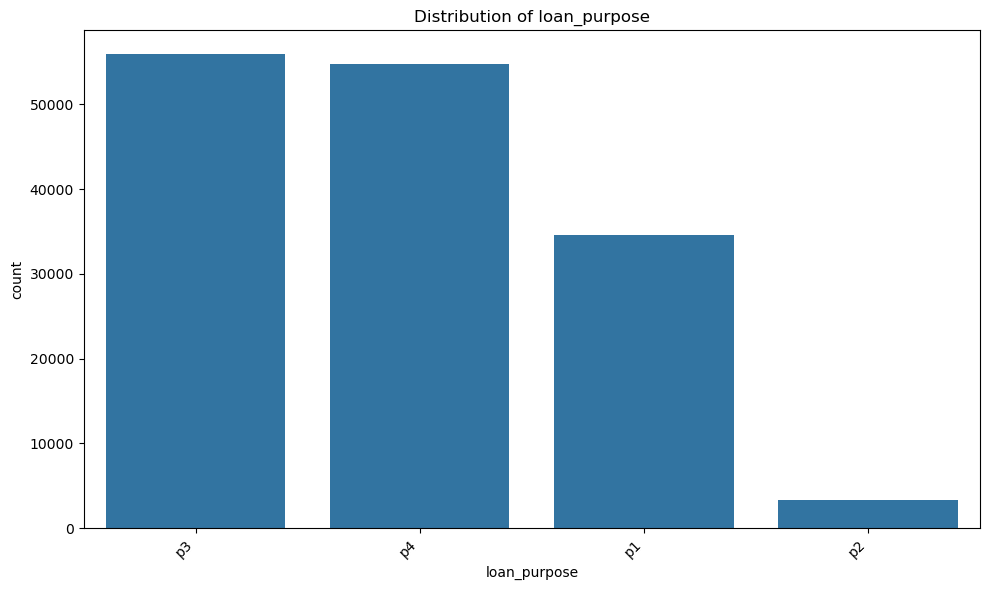

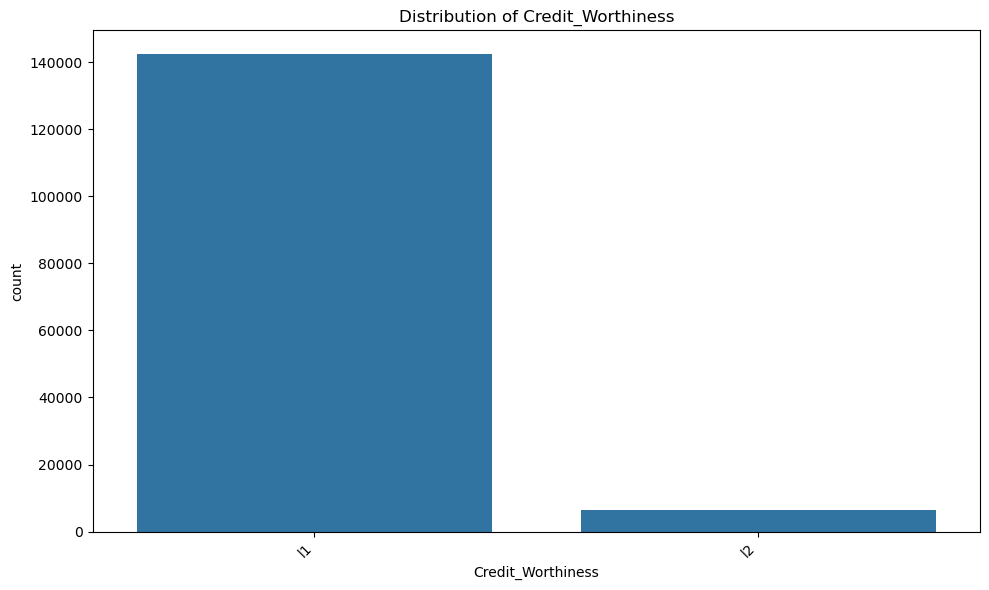

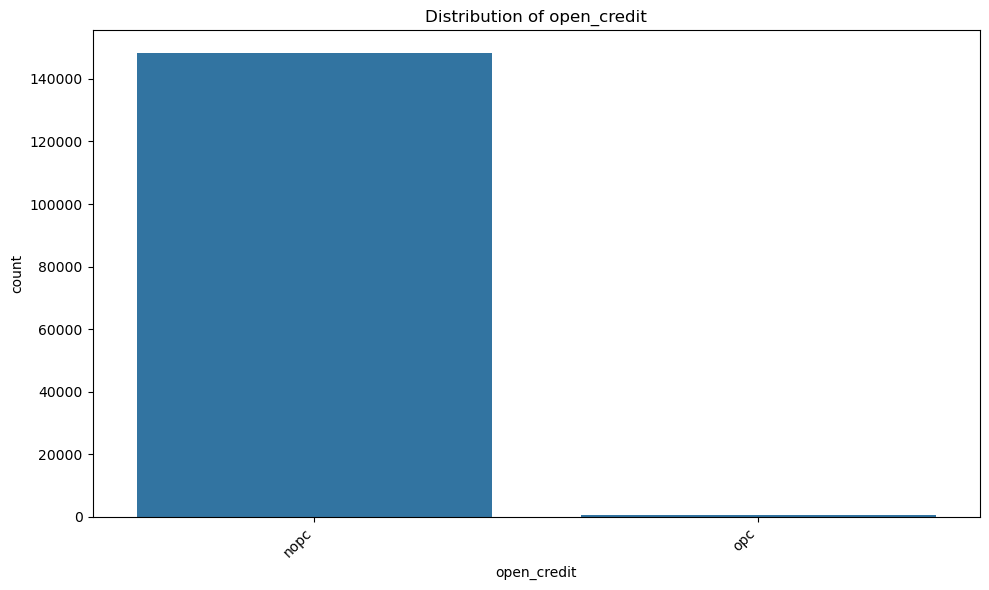

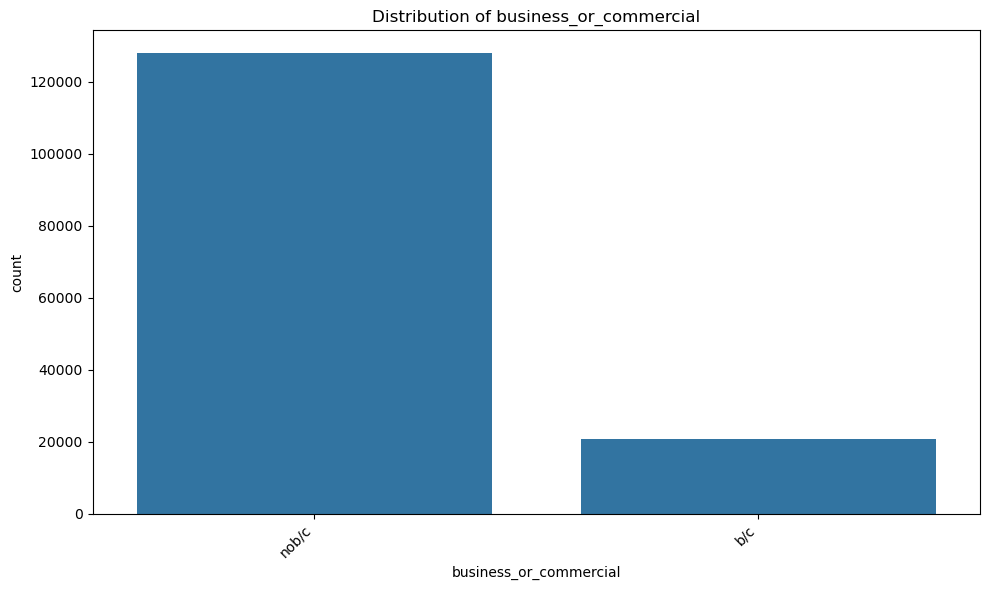

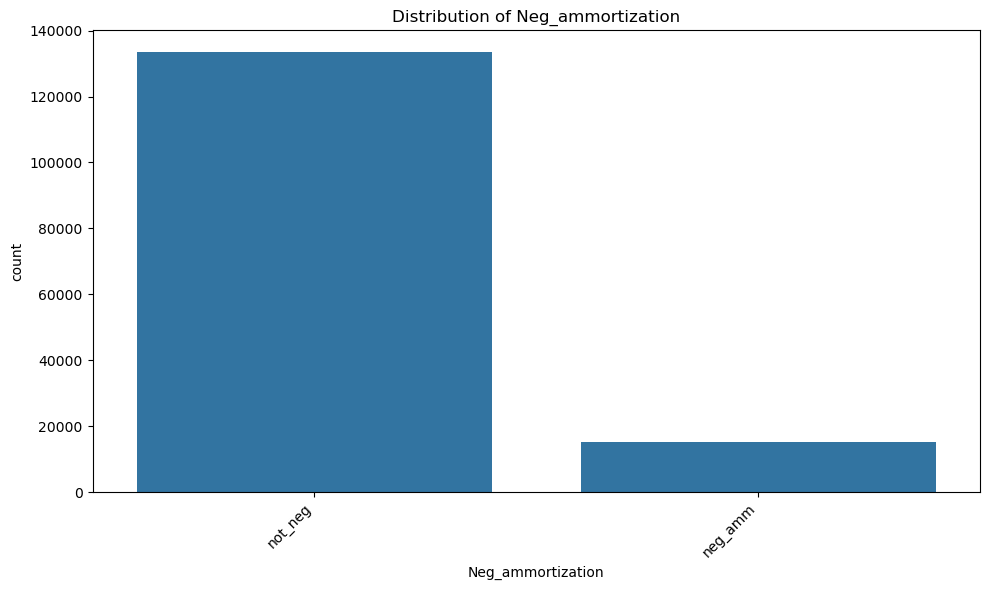

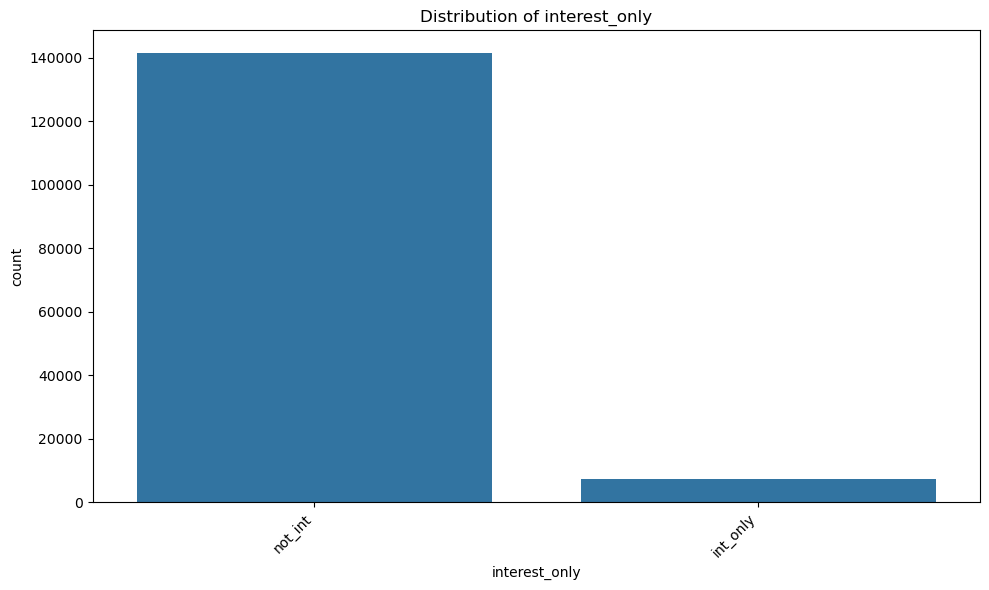

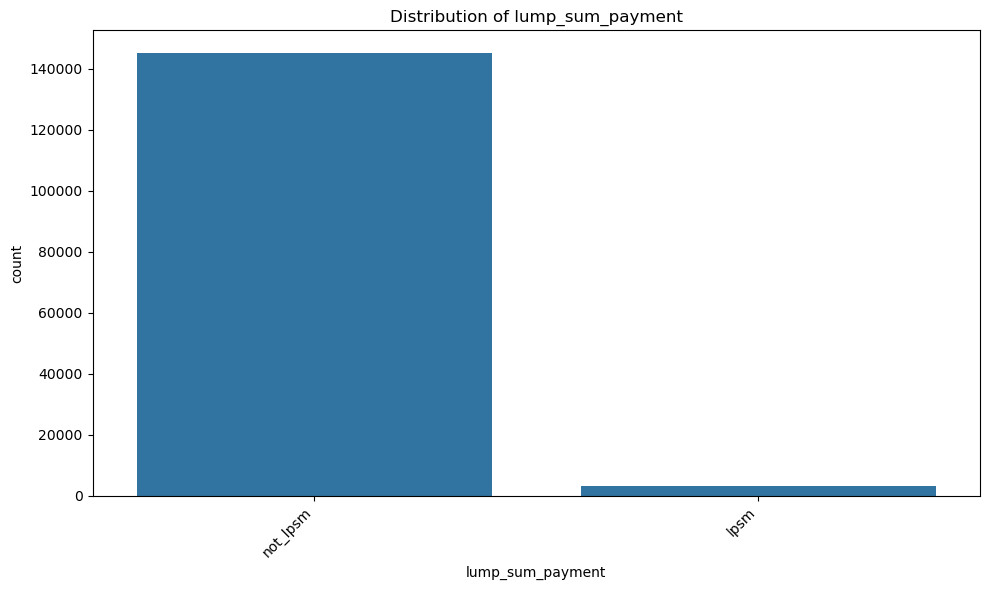

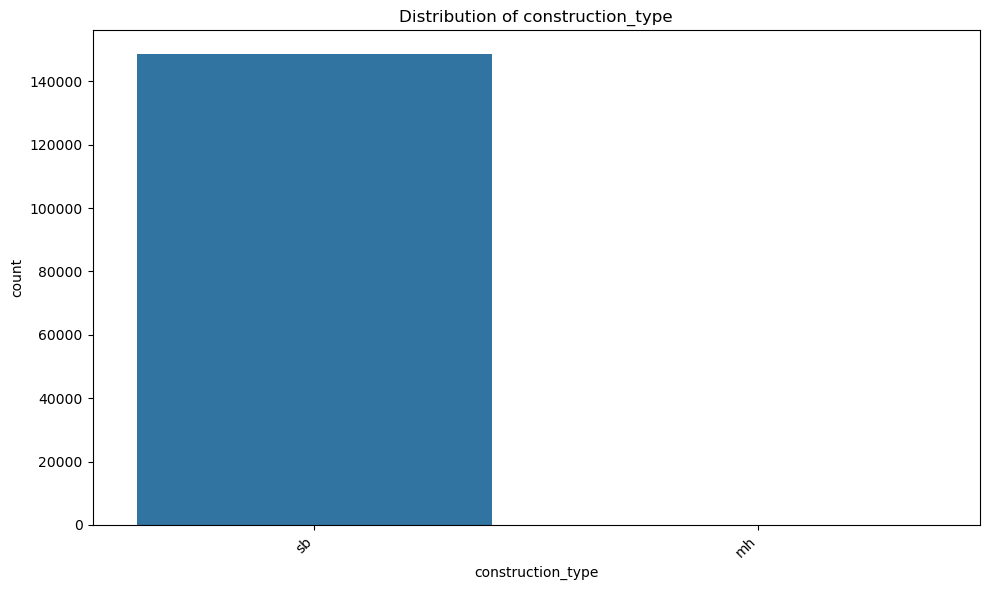

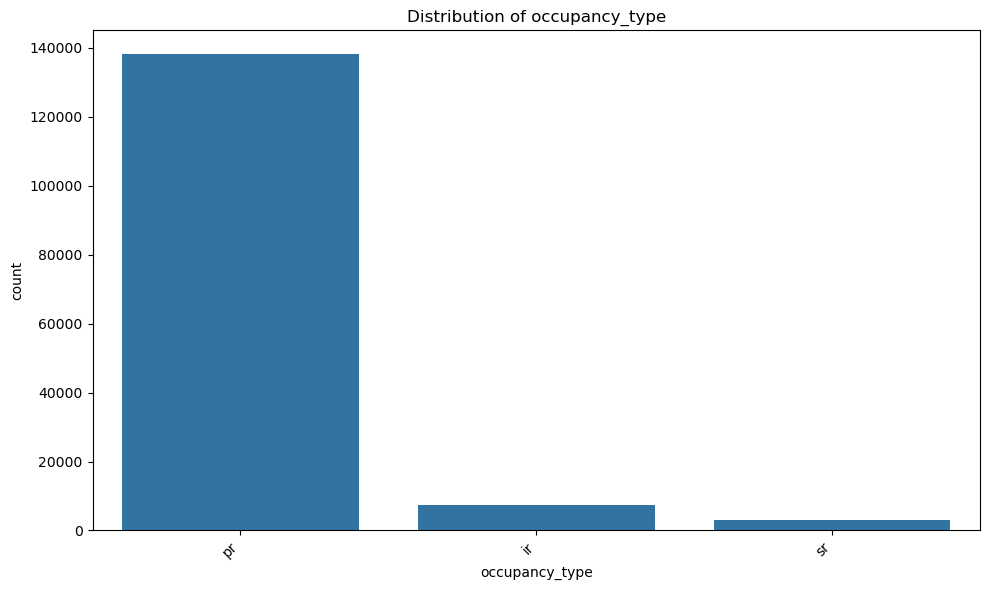

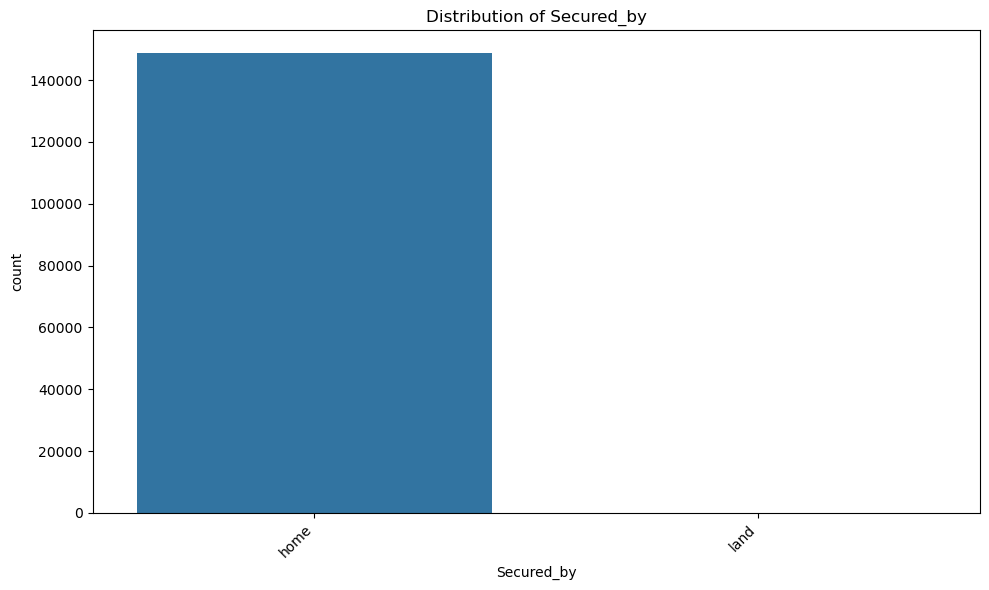

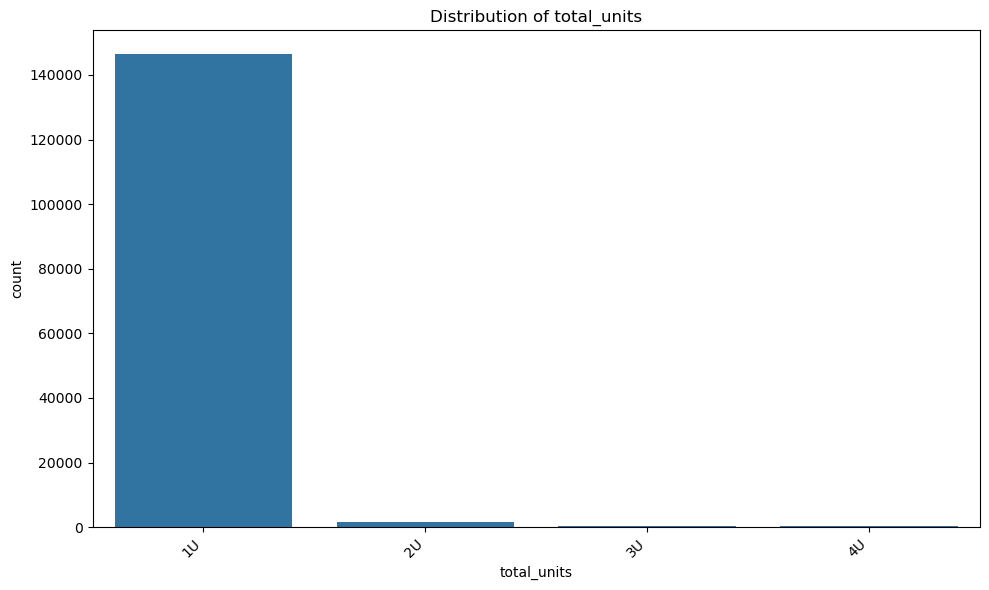

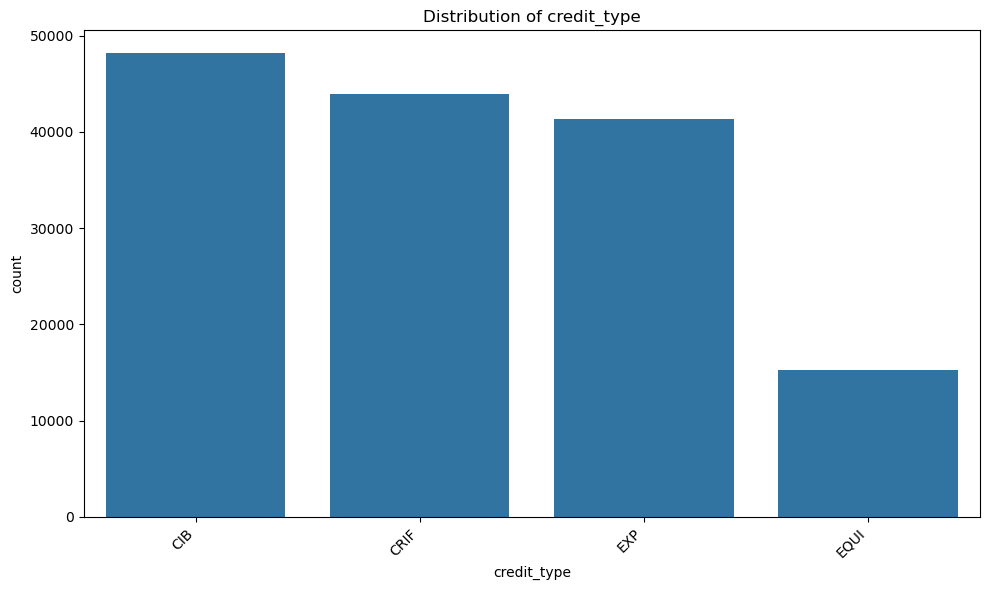

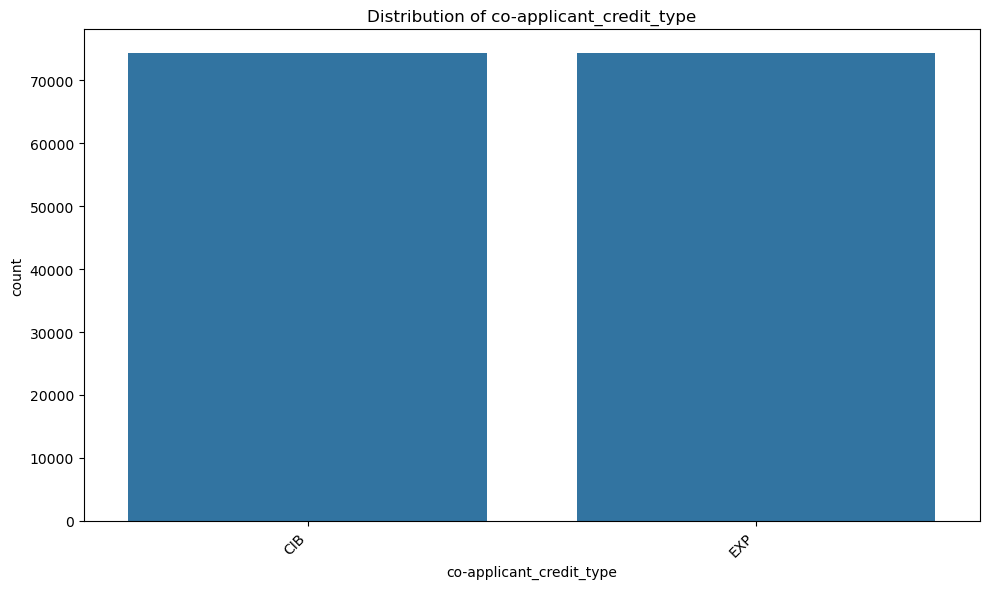

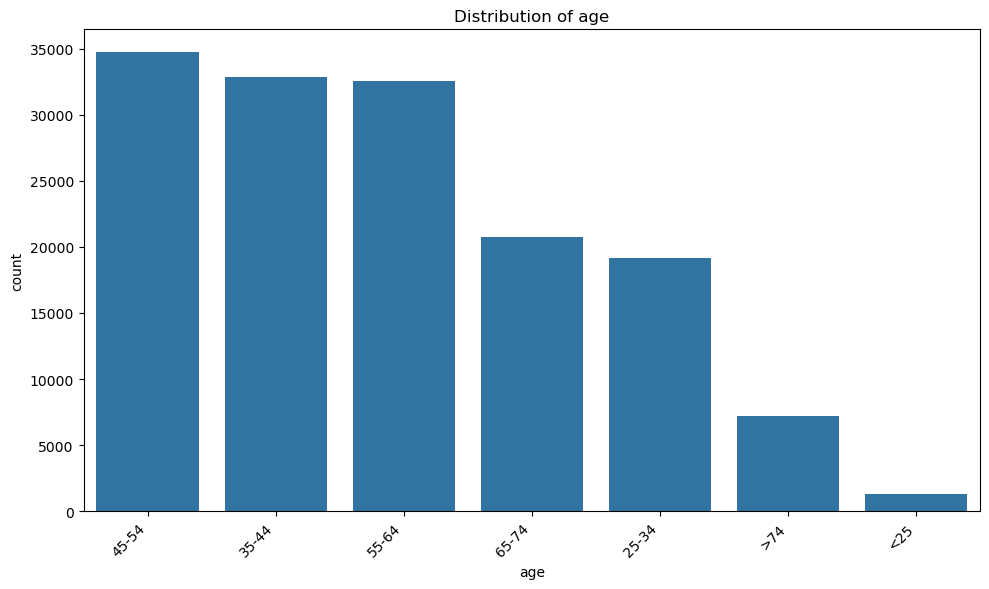

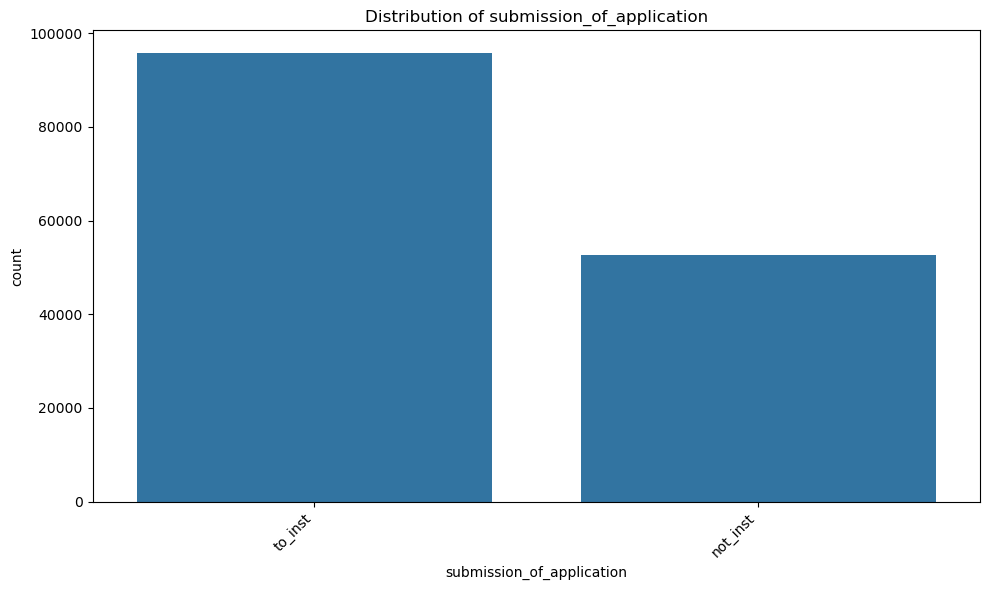

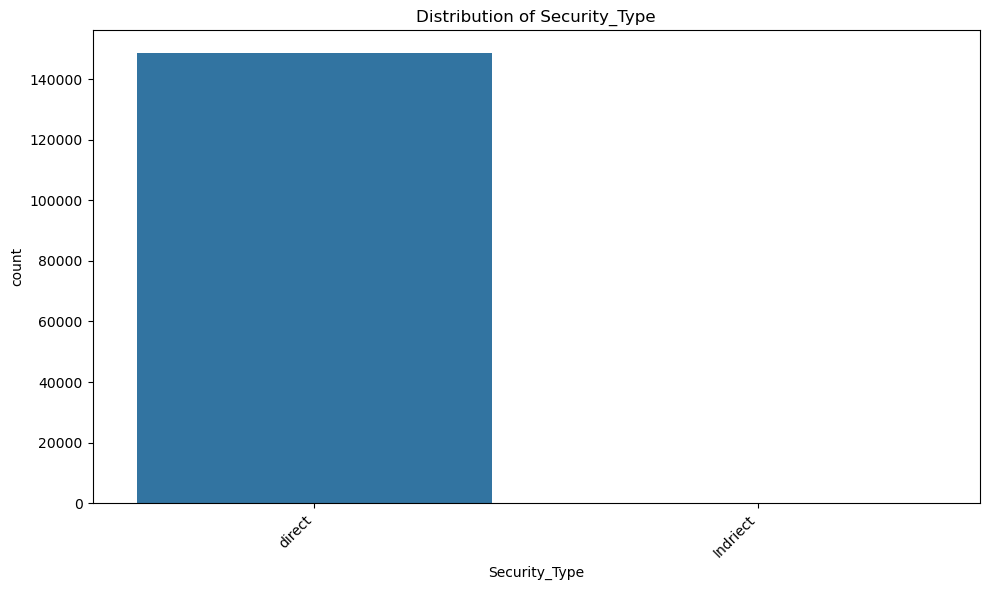

In [59]:


# Create histograms for key numerical features
numerical_features = ['loan_amount', 'Credit_Score', 'income', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'LTV', 'dtir1']
loan[numerical_features].hist(figsize=(15, 10), bins=50)
plt.tight_layout()
plt.show()

# Create bar plots for key categorical features
categorical_features = ['Gender', 'loan_type', 'Region', 'loan_limit', 'approv_in_adv', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Security_Type']
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

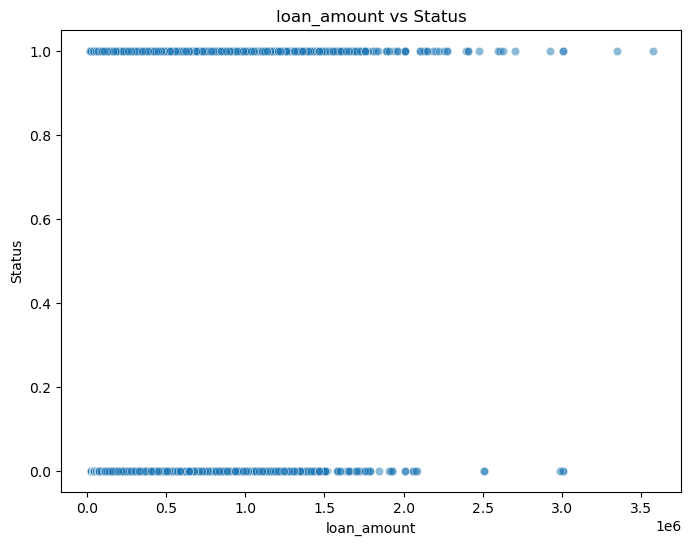

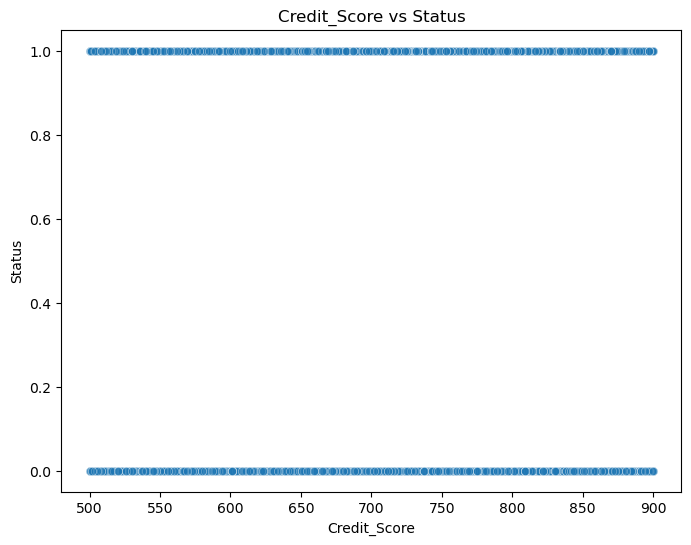

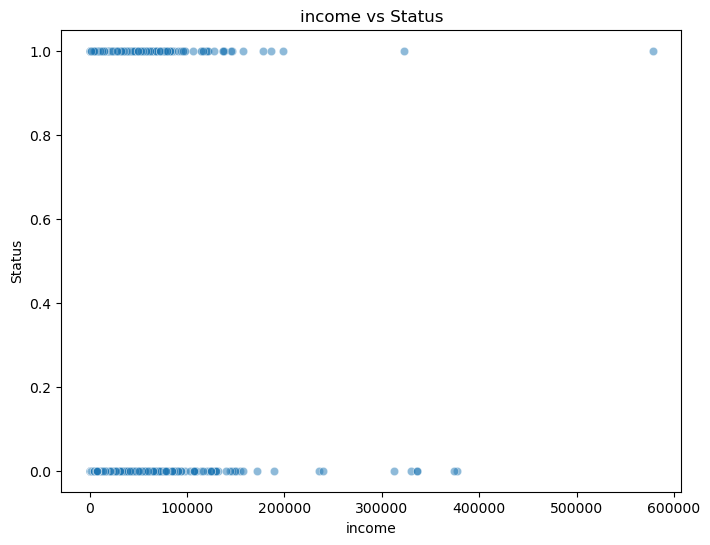

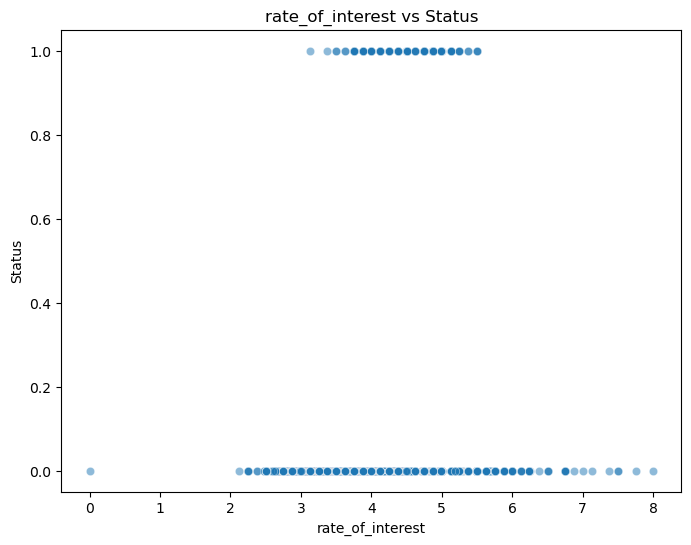

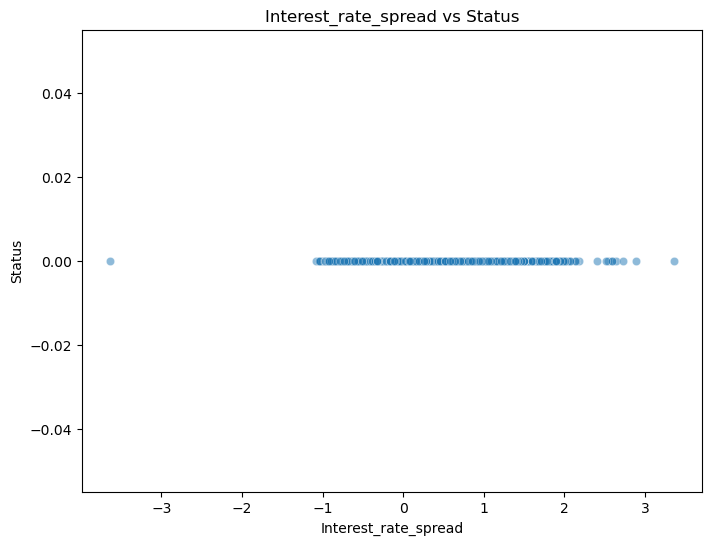

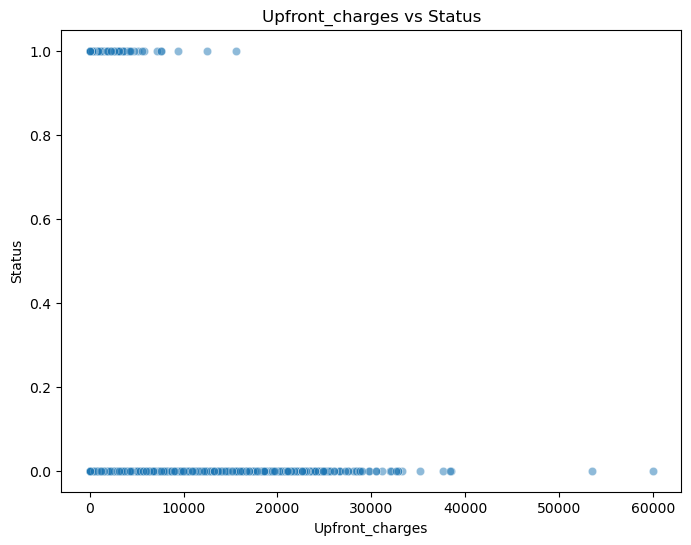

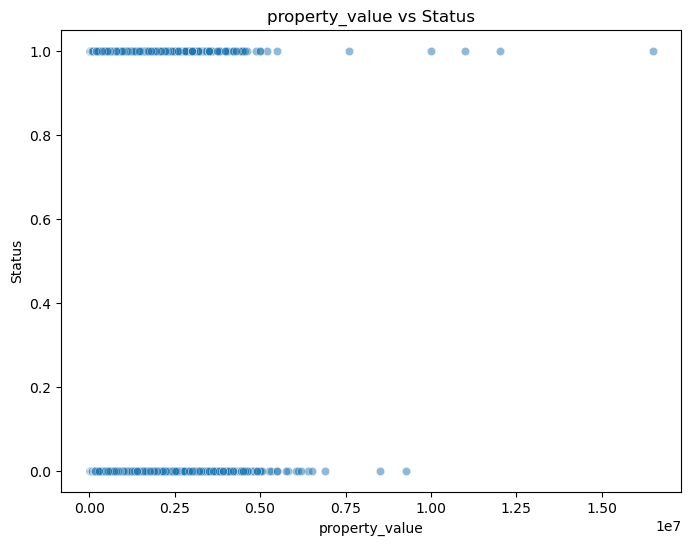

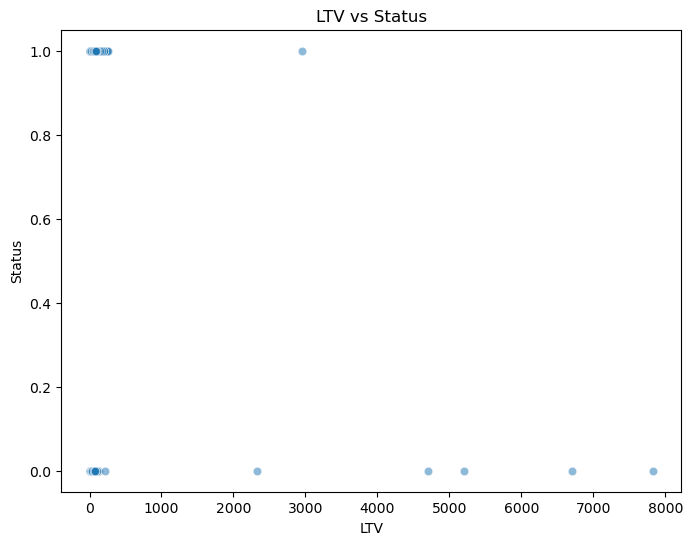

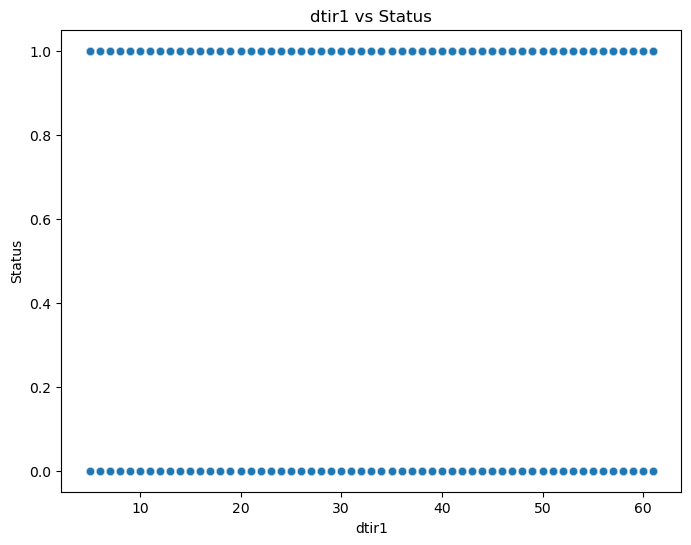

In [60]:
numerical_features = ['loan_amount', 'Credit_Score', 'income', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'LTV', 'dtir1']
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='Status', alpha=0.5)
    plt.title(f'{col} vs Status')
    plt.xlabel(col)
    plt.ylabel('Status')
    plt.show()

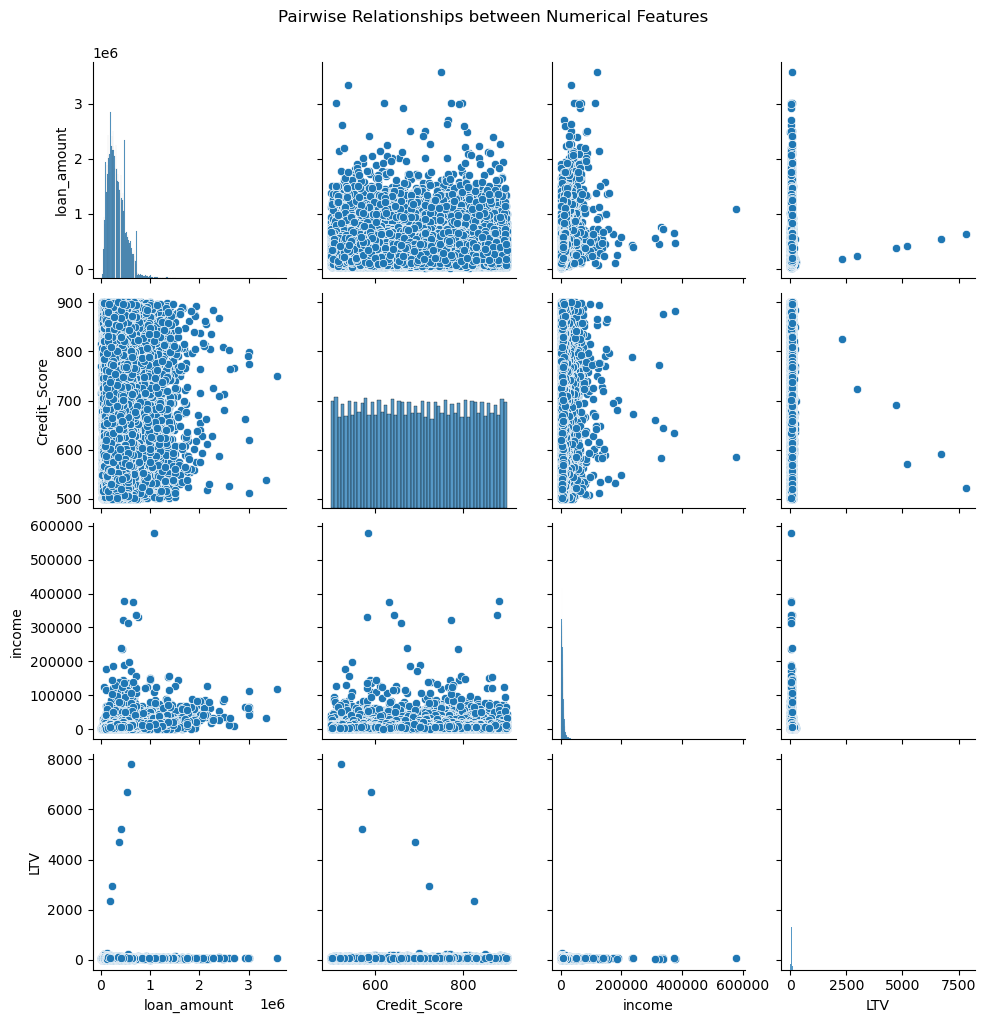

In [61]:
numerical_features = ['loan_amount', 'Credit_Score', 'income', 'LTV']

# Plotting pairs of numerical features
sns.pairplot(df[numerical_features])
plt.suptitle('Pairwise Relationships between Numerical Features', y=1.02)
plt.show()


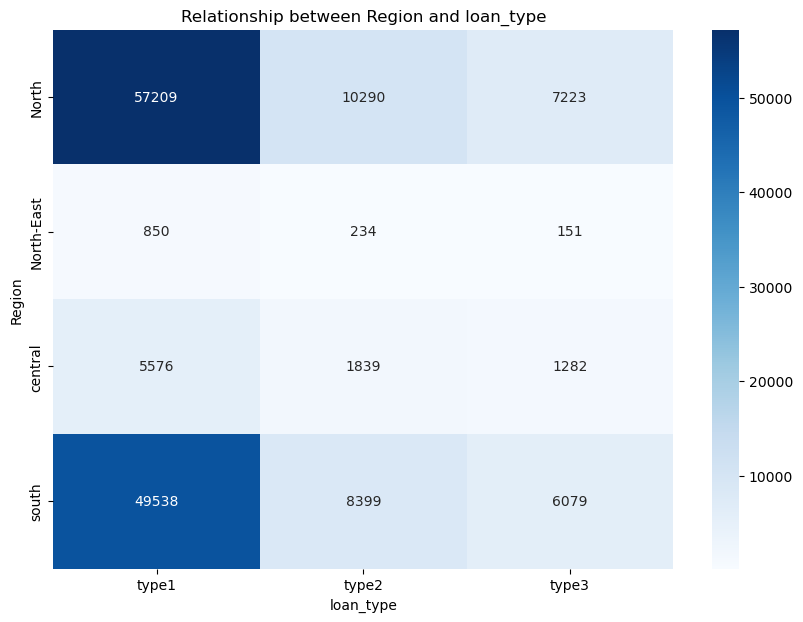

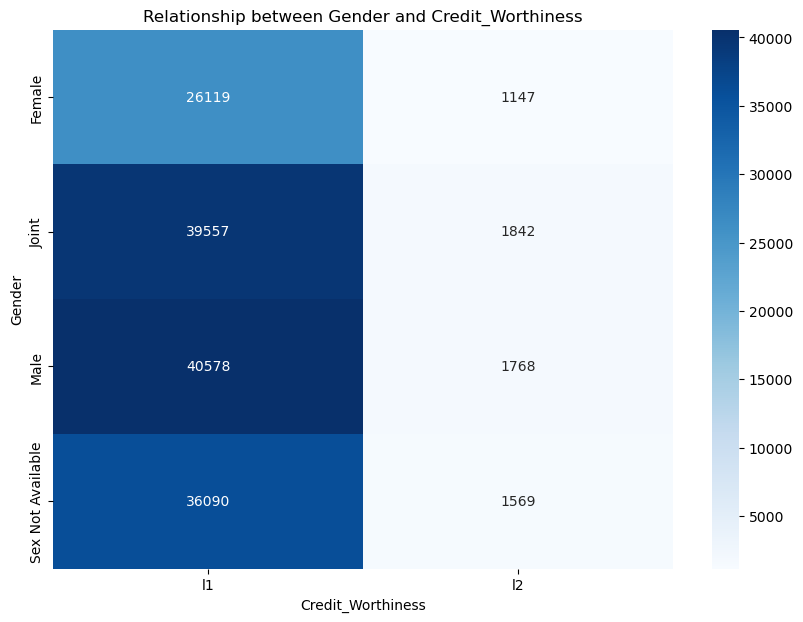

<Figure size 1000x600 with 0 Axes>

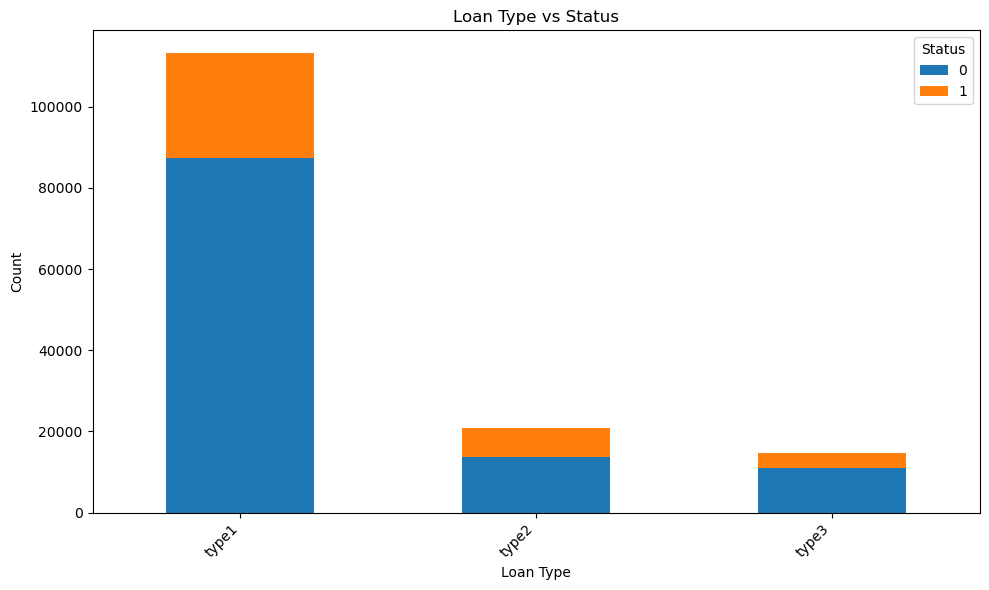

<Figure size 1000x600 with 0 Axes>

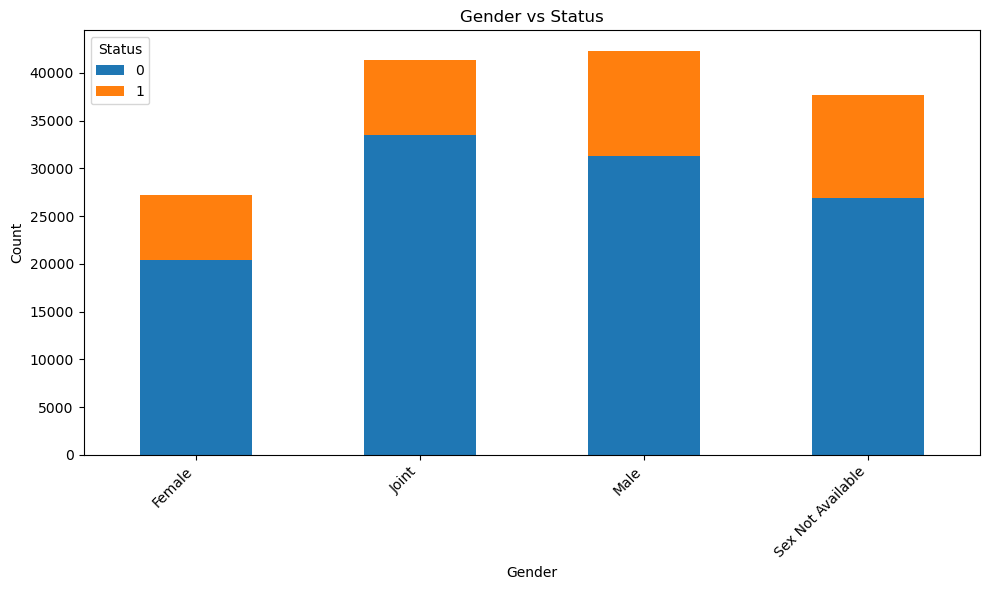

In [62]:
# Create cross-tabulations and visualize using heatmaps
categorical_pairs = [('Region', 'loan_type'), ('Gender', 'Credit_Worthiness')]

for cat1, cat2 in categorical_pairs:
    plt.figure(figsize=(10, 7))
    cross_tab = pd.crosstab(df[cat1], df[cat2])
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Relationship between {cat1} and {cat2}')
    plt.xlabel(cat2)
    plt.ylabel(cat1)
    plt.show()

# Create stacked bar plots for other categorical relationships
#  Loan Type vs. Status
plt.figure(figsize=(10, 6))
ct_loan_type_status = pd.crosstab(df['loan_type'], df['Status'])
ct_loan_type_status.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Type vs Status')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

#: Gender vs. Status
plt.figure(figsize=(10, 6))
ct_gender_status = pd.crosstab(df['Gender'], df['Status'])
ct_gender_status.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender vs Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

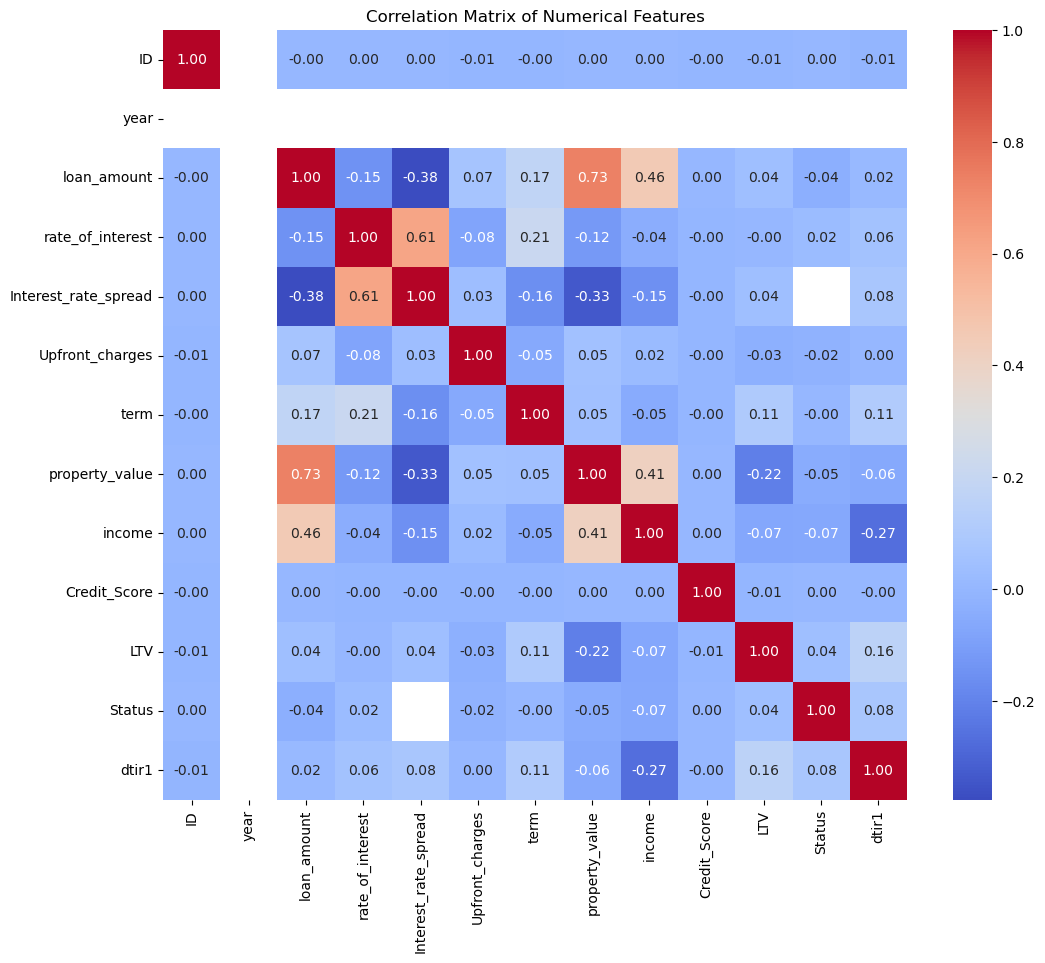

In [63]:


# Calculate the correlation matrix for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap visualization of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

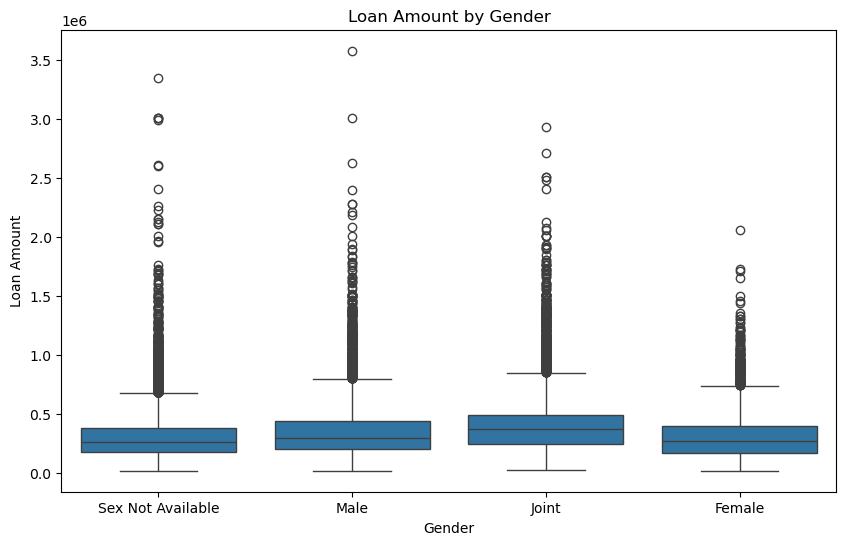

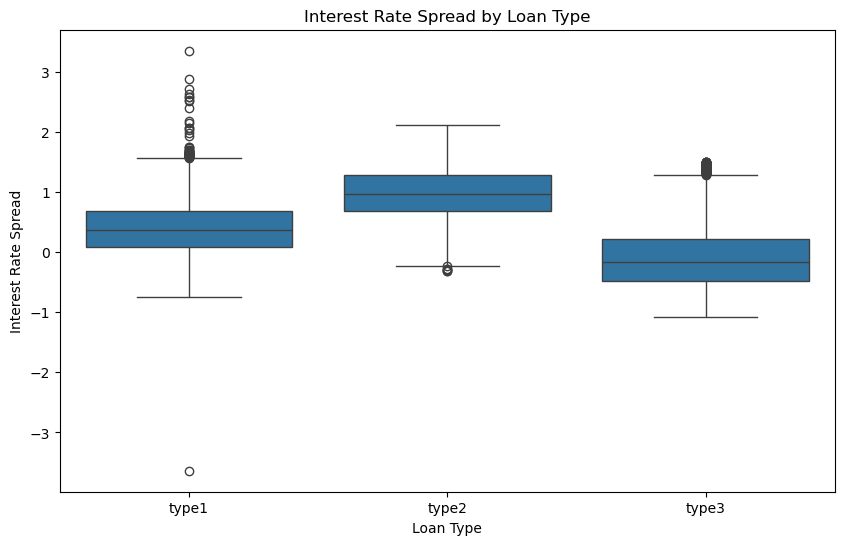

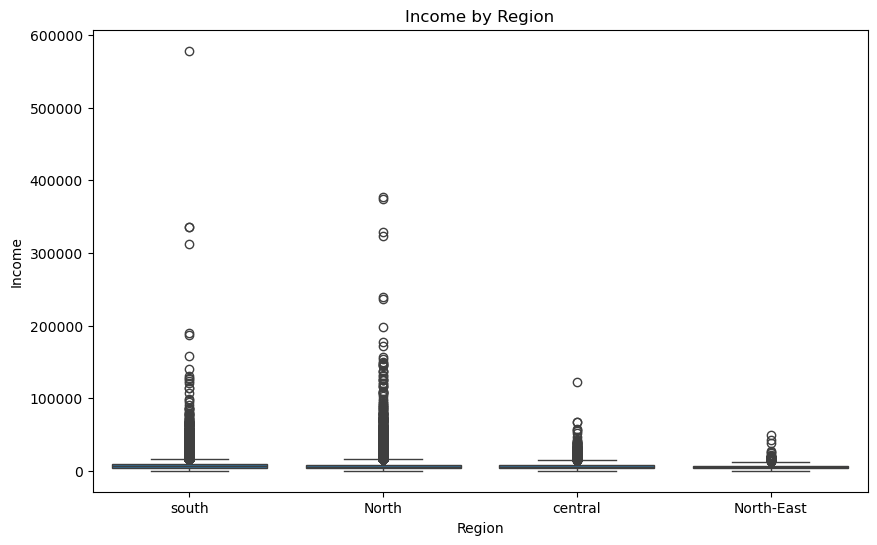

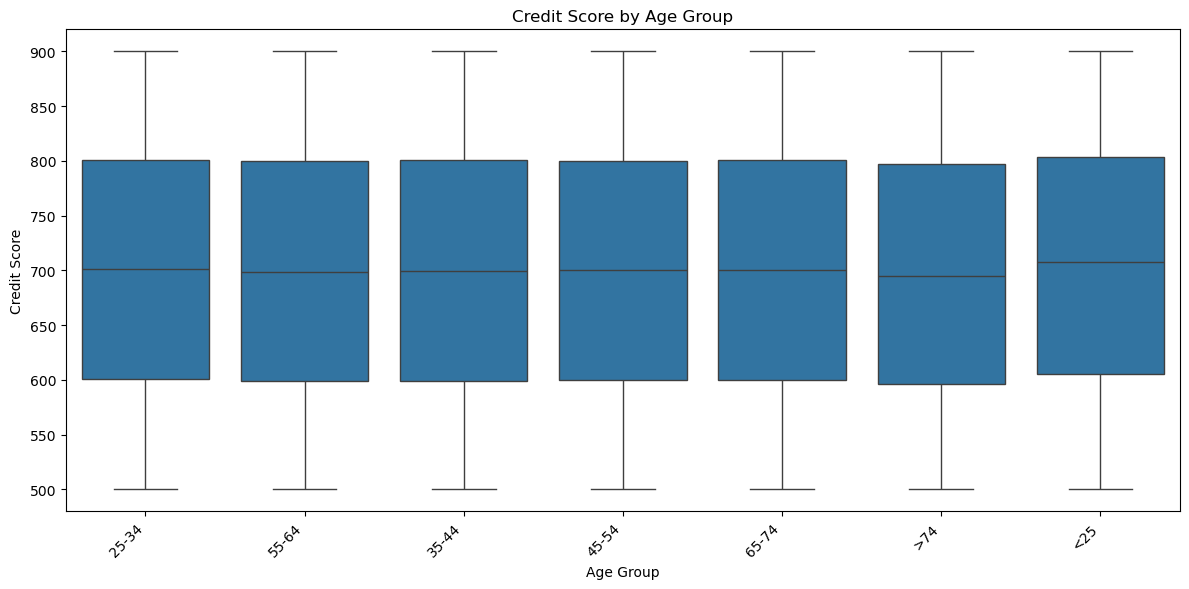

In [64]:
# Investigate relationships between categorical features and numerical features using box plots

# Relationship between Gender and loan_amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='loan_amount')
plt.title('Loan Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.show()

# Relationship between loan_type and Interest_rate_spread
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_type', y='Interest_rate_spread')
plt.title('Interest Rate Spread by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Interest Rate Spread')
plt.show()

#  Relationship between Region and income
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='income')
plt.title('Income by Region')
plt.xlabel('Region')
plt.ylabel('Income')
plt.show()

# Relationship between age and Credit_Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age', y='Credit_Score')
plt.title('Credit Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Credit Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()